In [70]:
from ROOT import TFile, TVector3, TMath
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, fabs
import SimTools
import sys

# Load Raw Electron Recoil Simulation

In [71]:
#Select the gas
gas = 'he_cf4'

# Energies to calculate
Energy = 150

# Select range in cm
dist = 2.0

# Drift [cm]
drift = 25



# Path to degrad dataframe
file_path = '~/data/e_ang_res/MS_test_sims/'+gas+'/'+str(Energy)+'_keV/'+gas+'_'+str(Energy)+'keV_' + str(0) + '/'+gas+'_'+str(Energy)+'keV_' + str(0) + '.root'

# Read out the recoil tracks and corresponding time ordering
tracks,times = SimTools.read_degrad(file_path)


index = 7
track = tracks[index]
time=times[index]


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias 

# Isolate initail part

In [72]:
ordered_track = SimTools.order_track(track,time)

x_init = []
y_init = []
z_init = []

x = []
y = []
z = []

for vector in ordered_track:
    
    v = TVector3(0.0,vector[1],vector[2])
    
    if (vector[0]**2 + vector[1]**2 + vector[2]**2) < (dist**2):
        x_init += [vector[0]]
        y_init += [vector[1]]
        z_init += [vector[2]]
        
    else:
        x += [vector[0]]
        y += [vector[1]]
        z += [vector[2]]
        
    

# Plot the track

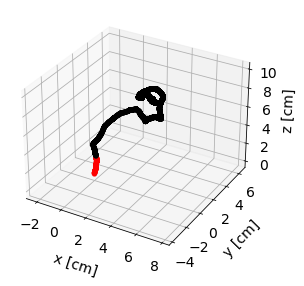

In [73]:
def axisEqual3D(ax):
    extents = np.array([getattr(ax, 'get_{}lim'.format(dim))() for dim in 'xyz'])
    sz = extents[:,1] - extents[:,0]
    centers = np.mean(extents, axis=1)
    maxsize = max(abs(sz))
    r = maxsize/2
    for ctr, dim in zip(centers, 'xyz'):
        getattr(ax, 'set_{}lim'.format(dim))(ctr - r, ctr + r)


fig = plt.figure()
ax = plt.axes(projection='3d')



ax.scatter3D(x, y, z, c='k', marker='o')
ax.scatter3D(x_init, y_init, z_init, c='r', marker='o')

ax.set_xlabel('x [cm]',fontsize=14)
ax.set_ylabel('y [cm]',fontsize=14)
ax.set_zlabel('z [cm]',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=5

axisEqual3D(ax)
fig.set_tight_layout(True)
plt.savefig('./figures/nodiff.pdf')


# Load Diffuesed Electron Recoil Simulation

In [74]:
file_path = '~/data/e_ang_res/MS_Diff_test_sims/'+gas+'/'+str( int(drift) )+'cm_drift_'+str(Energy)+'keV.root'

tracks,times = SimTools.read_degrad(file_path)

track = tracks[index]
time = times[index]


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias 

# Isolate initail part

In [75]:
ordered_track = SimTools.order_track(track,time)

x_init = []
y_init = []
z_init = []

x = []
y = []
z = []

for vector in ordered_track:
    
    v = TVector3(0.0,vector[1],vector[2])
    
    if (vector[0]**2 + vector[1]**2 + vector[2]**2) < (dist**2):
        x_init += [vector[0]]
        y_init += [vector[1]]
        z_init += [vector[2]]
        
    else:
        x += [vector[0]]
        y += [vector[1]]
        z += [vector[2]]
        

# Plot the track

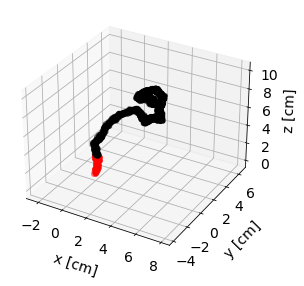

In [76]:
fig = plt.figure()
ax = plt.axes(projection='3d')



ax.scatter3D(x, y, z, c='k', marker='o')
ax.scatter3D(x_init, y_init, z_init, c='r', marker='o')


ax.set_xlabel('x [cm]',fontsize=14)
ax.set_ylabel('y [cm]',fontsize=14)
ax.set_zlabel('z [cm]',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=5

axisEqual3D(ax)
fig.set_tight_layout(True)
plt.savefig('./figures/diff.pdf')
